# 1.0 Business Problem

A leading micro-mobility service provider, which offers unique
vehicles for the daily commute.
provider wants to understand the factors affecting the demand for these shared electric cycles in the Indian market.      

The company wants to know:    
- Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
- How well those variables describe the electric cycle demands


## 1.1 Data Problem

- Explore mobility data and understand factors influencing customer demand
- Analyse attributes and perform hypothesis tests to understand relationship between factors    

## 1.1.a Metrics
- Increase in ridership count after implementing recommendations   

##  1.2 Column Profile

- **datetime**: datetime
- **season**: season
  - 1: spring
  - 2: summer
  - 3: fall
  - 4: winter
- **holiday**: whether
     - day is a holiday
     - or not holiday     
     (extracted from http://dchr.dc.gov/page/holiday-schedule )
- **workingday**:   
  - 1 if day is neither weekend nor holiday is 1    
  - otherwise is 0.    
  
- **weather**:
 - 1: Clear, Few clouds, partly cloudy, partly cloudy
 - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
 - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light
Rain + Scattered clouds
 -  4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- **temp**: temperature in Celsius
- **atemp**: feeling temperature in Celsius
- **humidity**: humidity
- **windspeed**: wind speed
- **casual**: count of casual users
- **registered**: count of registered users
- **count**: count of total rental bikes including both casual and registered

## 1.4 load data

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro,levene,probplot
from scipy.stats import ttest_ind,f_oneway,chi2_contingency

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd /content/drive/My Drive/case

/content/drive/My Drive/case


In [4]:
df = pd.read_csv('mobility.csv')

In [5]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## 1.5 data observations

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


From the above we conclude:    
 - dataset has 12 attributes
 - datetime: is a temporal variable    
 - count: is the dependent variable,since we want to understand the demand
 - All other attributes are numeric
 - there are 10886 observations
 - there are no nulls in dataset

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


from the above we see ranges for attribues are   
temp: (0.82000,41.00000)     
atemp: (0.760000,45.455000)     
humidity:(0.000,100.00)     
windspeed:(0.000,56.9969)     
casual:(0.0000,367.000)     
registered:(0.0000,886.0000)     
count:(1.00,977.00)     

## 1.6 Check Cardinality & convert columns

In [7]:
# get count of unique values in columns
df.nunique()

,0
datetime,10886
season,4
holiday,2
workingday,2
weather,4
temp,49
atemp,60
humidity,89
windspeed,28
casual,309


From the above we see that for columns season , holiday, workingday & weather  cardinality is less than 20. So these columns can be conveted into category type

In [8]:
# convert  to category
df['season'] = df['season'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['workingday'] = df['workingday'].astype('category')
df['weather'] = df['weather'].astype('category')

#Convert 'date_added' to datetime type
df['datetime'] = df['datetime'].astype('datetime64[ns]')
# create columns for year,month,hour
df['date_yr']= df['datetime'].dt.year
df['date_mn'] =df['datetime'].dt.month
df['date_hr']= df['datetime'].dt.hour

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  date_yr     10886 non-null  int32         
 13  date_mn     10886 non-null  int32         
 14  date_hr     10886 non-null  int32         
dtypes: category(4), datetime64[ns](1), float64(3), int32(3), int64(4)
memo

In [10]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date_yr,date_mn,date_hr
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,4


## 1.7 Univariate Analysis

In [11]:
#check cardinality
df['season'].value_counts(normalize=True).round(4)*100

,proportion
season,
4,25.11
2,25.11
3,25.11
1,24.67


- Season counts are uniformly distributed

In [12]:
#check cardinality
df['holiday'].value_counts(normalize=True).round(4)*100

,proportion
holiday,
0,97.14
1,2.86


- Only 2.9%  observations are of type holiday=1

In [13]:
#check cardinality
df['workingday'].value_counts(normalize=True).round(4)*100

,proportion
workingday,
1,68.09
0,31.91


- 68 % observations are of type workingday = 1

In [14]:
#check cardinality
df['weather'].value_counts(normalize=True).round(4)*100

,proportion
weather,
1,66.07
2,26.03
3,7.89
4,0.01


- 66% is of type 1 (Clear weather)    
- 26% is of type 2 (fewCloud)   
So 92% of usage is when weather is good

### temp

In [15]:
 df['temp'].describe()

,temp
count,10886.00000
mean,20.23086
std,7.79159
min,0.82000
25%,13.94000
50%,20.50000
75%,26.24000
max,41.00000


In [16]:
df['temp'].value_counts(bins=[0, 5,10, 15, 20, 25,30,35,40,45],
                        sort=False,normalize=True).round(4)*100

,proportion
"(-0.001, 5.0]",1.19
"(5.0, 10.0]",10.38
"(10.0, 15.0]",19.60
"(15.0, 20.0]",17.59
"(20.0, 25.0]",19.11
"(25.0, 30.0]",20.71
"(30.0, 35.0]",9.65
"(35.0, 40.0]",1.76
"(40.0, 45.0]",0.01


- 77% of temp is between 10-30 celcius   
So most usage is when temparature is moderate

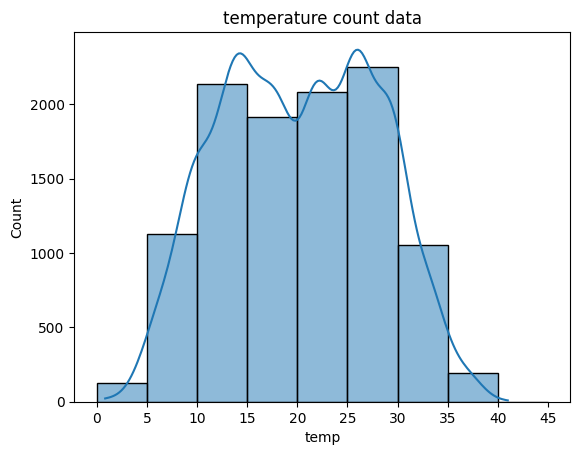

In [17]:
sns.histplot(data=df,x='temp',kde=True, bins=[0, 5,10, 15, 20, 25,30,35,40,45])
plt.title("temperature count data")
plt.xticks([i for i in range(0, 50, 5)])
plt.show()

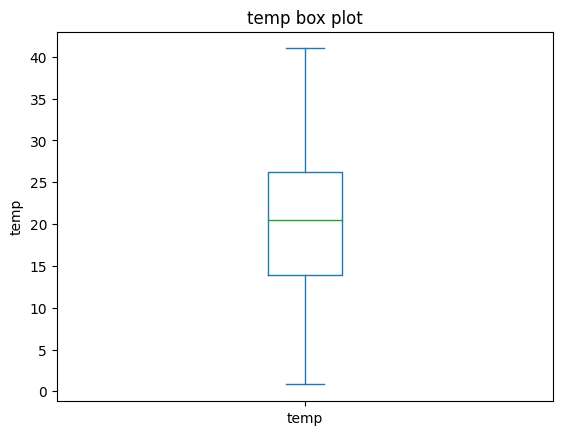

In [18]:
df['temp'].plot(kind="box")
plt.title('temp box plot')
plt.ylabel("temp" )
plt.show()

### atemp

In [19]:
 df['atemp'].describe()

,atemp
count,10886.000000
mean,23.655084
std,8.474601
min,0.760000
25%,16.665000
50%,24.240000
75%,31.060000
max,45.455000


In [20]:
df['atemp'].value_counts(bins=[0, 5,10, 15, 20, 25,30,35,40,45],
                        sort=False,normalize=True).round(4)*100

,proportion
"(-0.001, 5.0]",0.40
"(5.0, 10.0]",4.90
"(10.0, 15.0]",12.72
"(15.0, 20.0]",15.71
"(20.0, 25.0]",21.61
"(25.0, 30.0]",14.81
"(30.0, 35.0]",22.63
"(35.0, 40.0]",5.86
"(40.0, 45.0]",1.36


- 87% of atemp is between 10-35 celcius

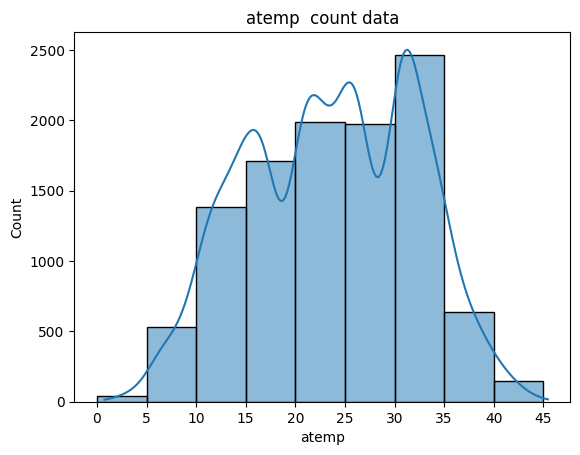

In [21]:
sns.histplot(data=df,x='atemp',kde=True, bins=[0, 5,10, 15, 20, 25,30,35,40,45])
plt.title("atemp  count data")
plt.xticks([i for i in range(0, 50, 5)])
plt.show()

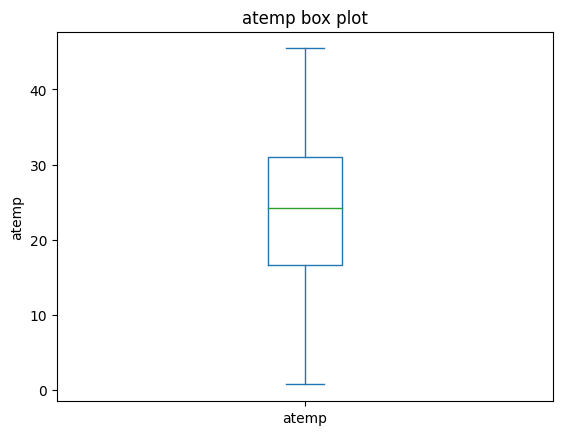

In [22]:
df['atemp'].plot(kind="box")
plt.title('atemp box plot')
plt.ylabel("atemp" )
plt.show()

### humidity

In [23]:
 df['humidity'].describe()

,humidity
count,10886.000000
mean,61.886460
std,19.245033
min,0.000000
25%,47.000000
50%,62.000000
75%,77.000000
max,100.000000


In [24]:
df['humidity'].value_counts(bins=[i for i in range(0,110, 10)],
                        sort=False,normalize=True).round(4)*100

,proportion
"(-0.001, 10.0]",0.22
"(10.0, 20.0]",0.50
"(20.0, 30.0]",3.80
"(30.0, 40.0]",10.53
"(40.0, 50.0]",16.08
"(50.0, 60.0]",16.66
"(60.0, 70.0]",16.95
"(70.0, 80.0]",14.12
"(80.0, 90.0]",14.88
"(90.0, 100.0]",6.26


- 78.7% of humidity is between 40-90 celcius

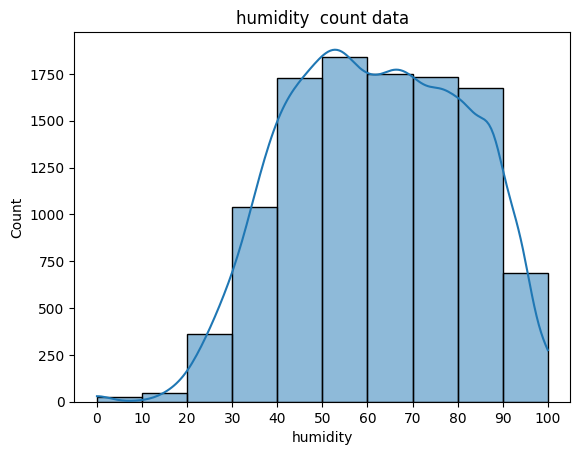

In [25]:
sns.histplot(data=df,x='humidity',kde=True, bins=[i for i in range(0,110, 10)])
plt.title("humidity  count data")
plt.xticks([i for i in range(0,110, 10)])
plt.show()

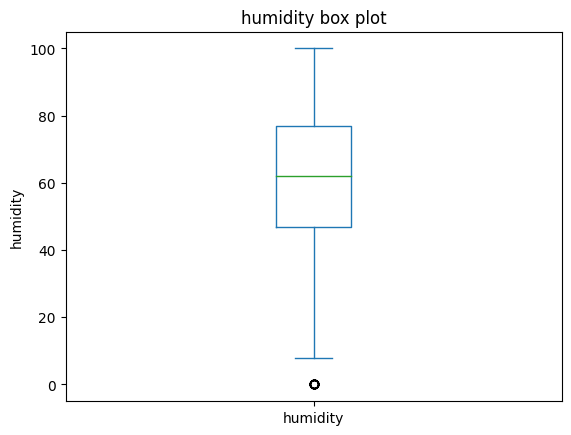

In [26]:
df['humidity'].plot(kind="box")
plt.title('humidity box plot')
plt.ylabel("humidity" )
plt.show()

### windspeed

In [27]:
 df['windspeed'].describe()

,windspeed
count,10886.000000
mean,12.799395
std,8.164537
min,0.000000
25%,7.001500
50%,12.998000
75%,16.997900
max,56.996900


In [28]:
df['windspeed'].value_counts(bins=[i for i in range(0,70, 10)],
                        sort=False,normalize=True).round(4)*100

,proportion
"(-0.001, 10.0]",39.86
"(10.0, 20.0]",46.41
"(20.0, 30.0]",9.81
"(30.0, 40.0]",3.56
"(40.0, 50.0]",0.33
"(50.0, 60.0]",0.04


- 86.3% of windspeed is between 0-20  
During high  windspeed usage is less

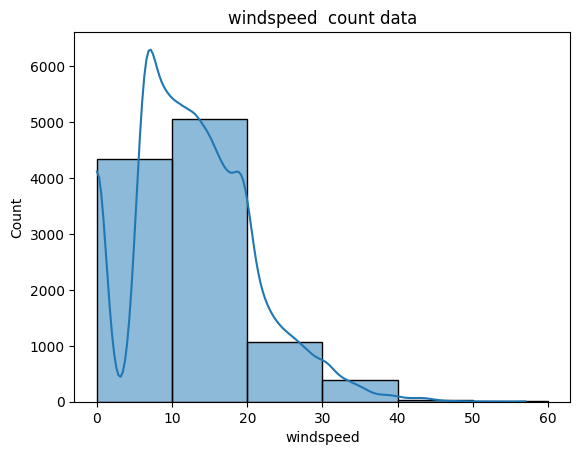

In [29]:
sns.histplot(data=df,x='windspeed',kde=True, bins=[i for i in range(0,70, 10)])
plt.title("windspeed  count data")
plt.xticks([i for i in range(0,70, 10)])
plt.show()

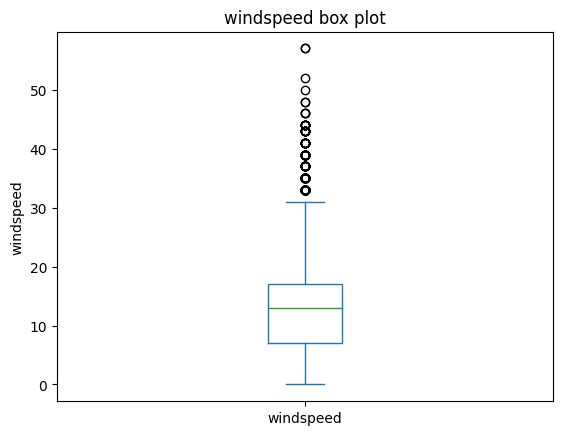

In [30]:
df['windspeed'].plot(kind="box")
plt.title('windspeed box plot')
plt.ylabel("windspeed" )
plt.show()

### casual

In [31]:
 df['casual'].describe()

,casual
count,10886.000000
mean,36.021955
std,49.960477
min,0.000000
25%,4.000000
50%,17.000000
75%,49.000000
max,367.000000


In [32]:
df['casual'].value_counts(bins=[i for i in range(0,400, 25)],
                        sort=False,normalize=True).round(4)*100

,proportion
"(-0.001, 25.0]",59.31
"(25.0, 50.0]",16.58
"(50.0, 75.0]",9.78
"(75.0, 100.0]",5.36
"(100.0, 125.0]",2.90
"(125.0, 150.0]",1.71
"(150.0, 175.0]",1.17
"(175.0, 200.0]",1.06
"(200.0, 225.0]",0.66
"(225.0, 250.0]",0.62


- 85.7% of casual is between 0-75

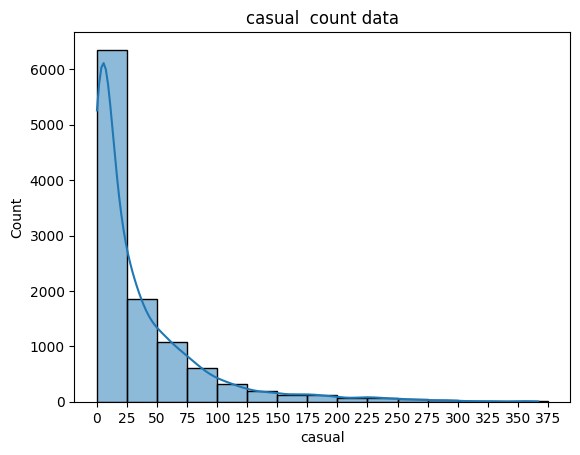

In [33]:
sns.histplot(data=df,x='casual',kde=True, bins=[i for i in range(0,400, 25)])
plt.title("casual  count data")
plt.xticks([i for i in range(0,400, 25)])
plt.show()

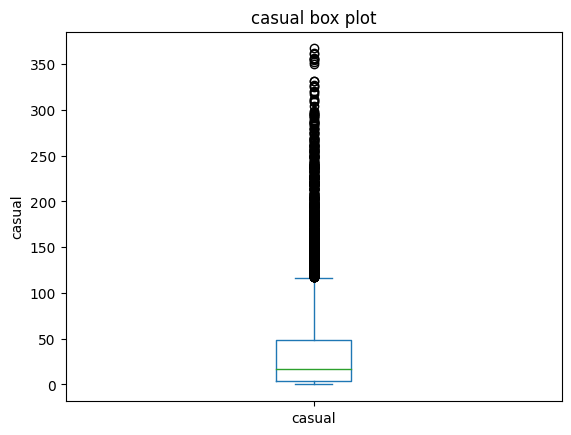

In [34]:
df['casual'].plot(kind="box")
plt.title('casual box plot')
plt.ylabel("casual" )
plt.show()

From the boxplot we observe  lower variability below median. There are also some outliers.
  

### registered

In [35]:
 df['registered'].describe()

,registered
count,10886.000000
mean,155.552177
std,151.039033
min,0.000000
25%,36.000000
50%,118.000000
75%,222.000000
max,886.000000


In [36]:
df['registered'].value_counts(bins=[i for i in range(0,950, 50)],
                        sort=False,normalize=True).round(4)*100

,proportion
"(-0.001, 50.0]",29.66
"(50.0, 100.0]",14.98
"(100.0, 150.0]",14.20
"(150.0, 200.0]",11.84
"(200.0, 250.0]",8.93
"(250.0, 300.0]",6.02
"(300.0, 350.0]",4.07
"(350.0, 400.0]",3.10
"(400.0, 450.0]",1.71
"(450.0, 500.0]",1.60


- 96.11% of registered is between 0-500

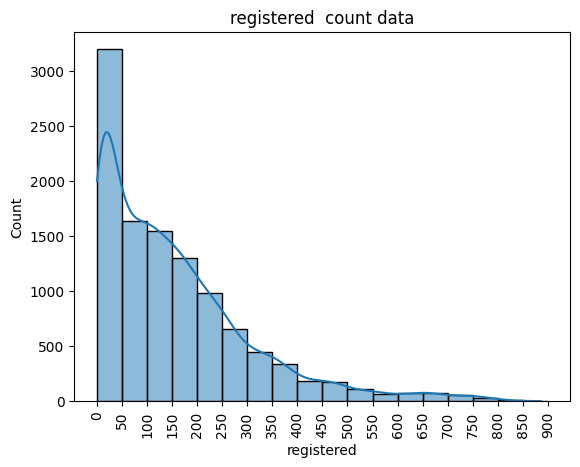

In [37]:
sns.histplot(data=df,x='registered',kde=True, bins=[i for i in range(0,950, 50)])
plt.title("registered  count data")
plt.xticks([i for i in range(0,950, 50)])
plt.xticks(rotation=90)
plt.show()

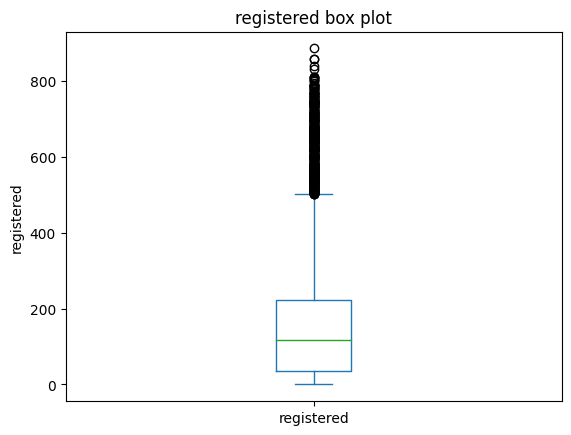

In [38]:
df['registered'].plot(kind="box")
plt.title('registered box plot')
plt.ylabel("registered" )
plt.show()

Boxplot for "resgistered users" shows low variability below median.It also shows presence of outliers.

### count

In [39]:
 df['count'].describe()

,count
count,10886.000000
mean,191.574132
std,181.144454
min,1.000000
25%,42.000000
50%,145.000000
75%,284.000000
max,977.000000


In [40]:
df['count'].value_counts(bins=[i for i in range(0,1000, 25)],
                        sort=False,normalize=True).round(4)*100

,proportion
"(-0.001, 25.0]",19.19
"(25.0, 50.0]",8.08
"(50.0, 75.0]",6.62
"(75.0, 100.0]",5.86
"(100.0, 125.0]",5.99
"(125.0, 150.0]",5.43
"(150.0, 175.0]",5.40
"(175.0, 200.0]",4.82
"(200.0, 225.0]",4.87
"(225.0, 250.0]",3.89


- 92.7% of count is between 0-500

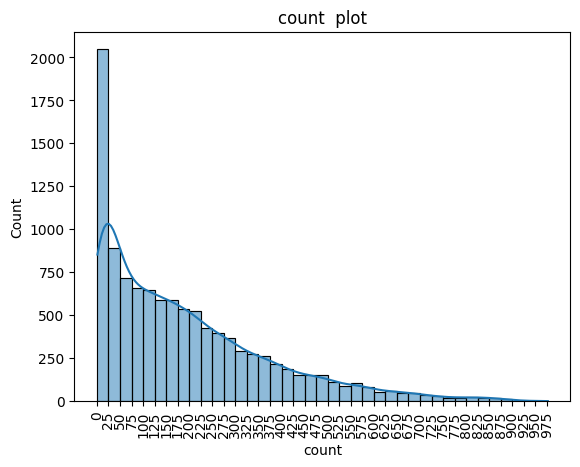

In [41]:
sns.histplot(data=df,x='count',kde=True, bins=[i for i in range(0,1000, 25)])
plt.title("count  plot")
plt.xticks([i for i in range(0,1000, 25)])
plt.xticks(rotation=90)
plt.show()

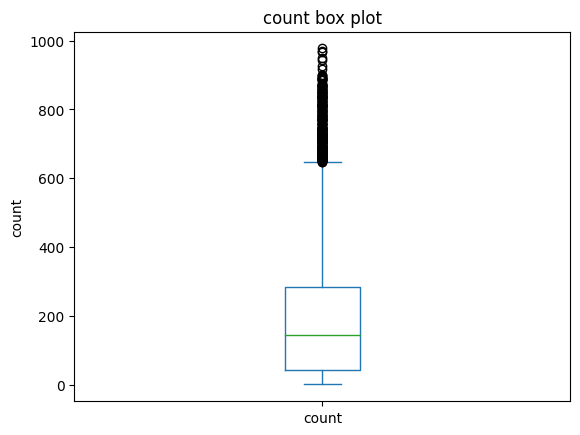

In [42]:
df['count'].plot(kind="box")
plt.title('count box plot')
plt.ylabel("count" )
plt.show()

### date_mn

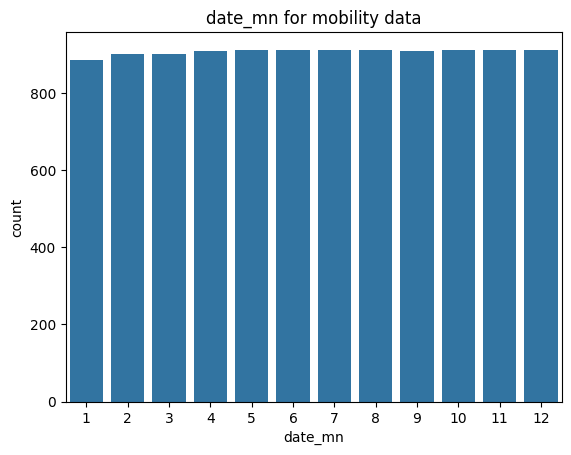

In [43]:
sns.countplot(data=df,x='date_mn')
plt.title("date_mn for mobility data")
plt.show()

### date_hr

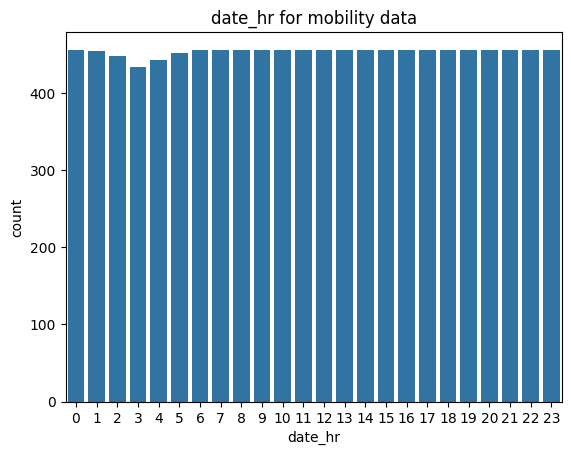

In [44]:
sns.countplot(data=df,x='date_hr')
plt.title("date_hr for mobility data")
plt.show()

- data is uniformly distributed across hours

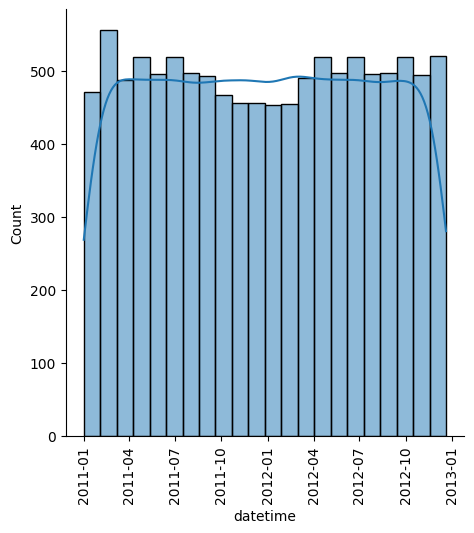

In [45]:
sns.displot(data=df,x='datetime',kde=True)
plt.xticks(rotation=90)
plt.show()

In [47]:
df['datetime'].describe()

,datetime
count,10886
mean,2011-12-27 05:56:22.399411968
min,2011-01-01 00:00:00
25%,2011-07-02 07:15:00
50%,2012-01-01 20:30:00
75%,2012-07-01 12:45:00
max,2012-12-19 23:00:00


Range for datetime is (2011-01-01,2012-12-19 ). So data is for 24 months from Jan-2011 to Dec-2012

## 1.8 Bi-variate Analysis

 ## workday and count

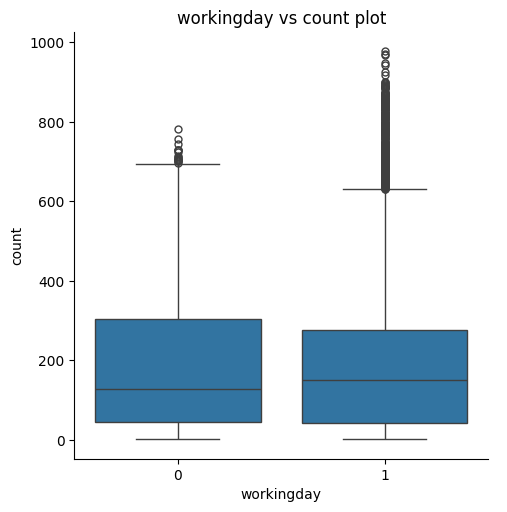

In [48]:
sns.catplot(x='workingday',y='count',data=df,kind='box',)
plt.title("workingday vs count plot")
plt.show()

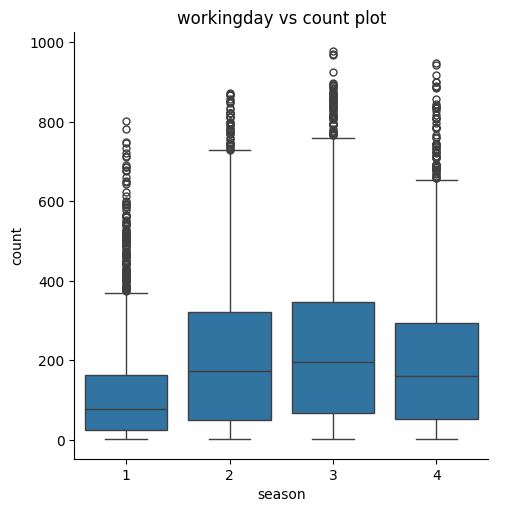

In [49]:
sns.catplot(x='season',y='count',data=df,kind='box',)
plt.title("workingday vs count plot")
plt.show()

- Median is high for seasons 3(fall),2(summer) and lowest for 1(spring)

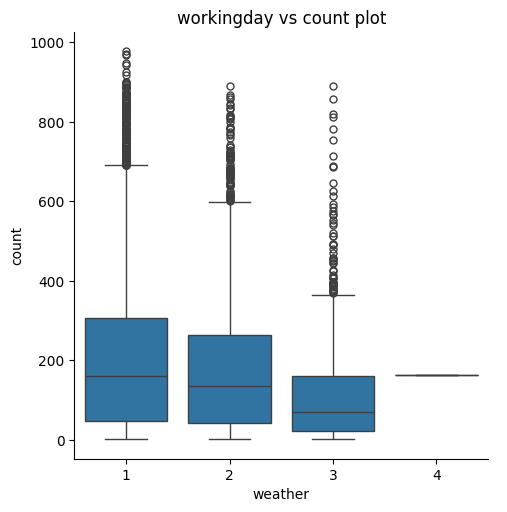

In [50]:
sns.catplot(x='weather',y='count',data=df,kind='box',)
plt.title("workingday vs count plot")
plt.show()

- For weather 1(Clear),2(Cloudy) median, is high

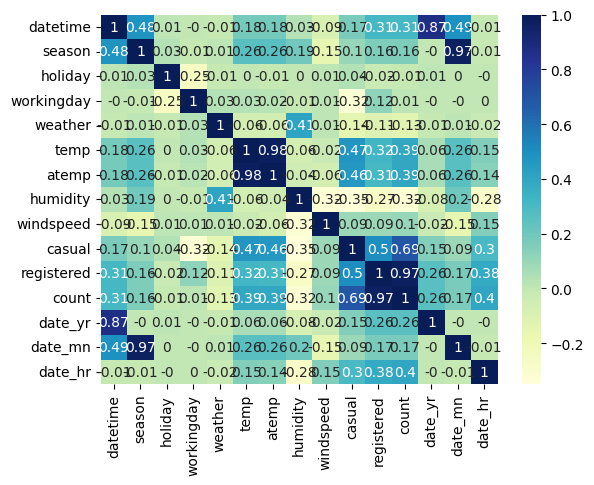

In [51]:
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr().round(2), cmap="YlGnBu", annot=True)

- variables registered, count have high correlation(0.97)
- variables temp, atemp have high correlation(0.98)

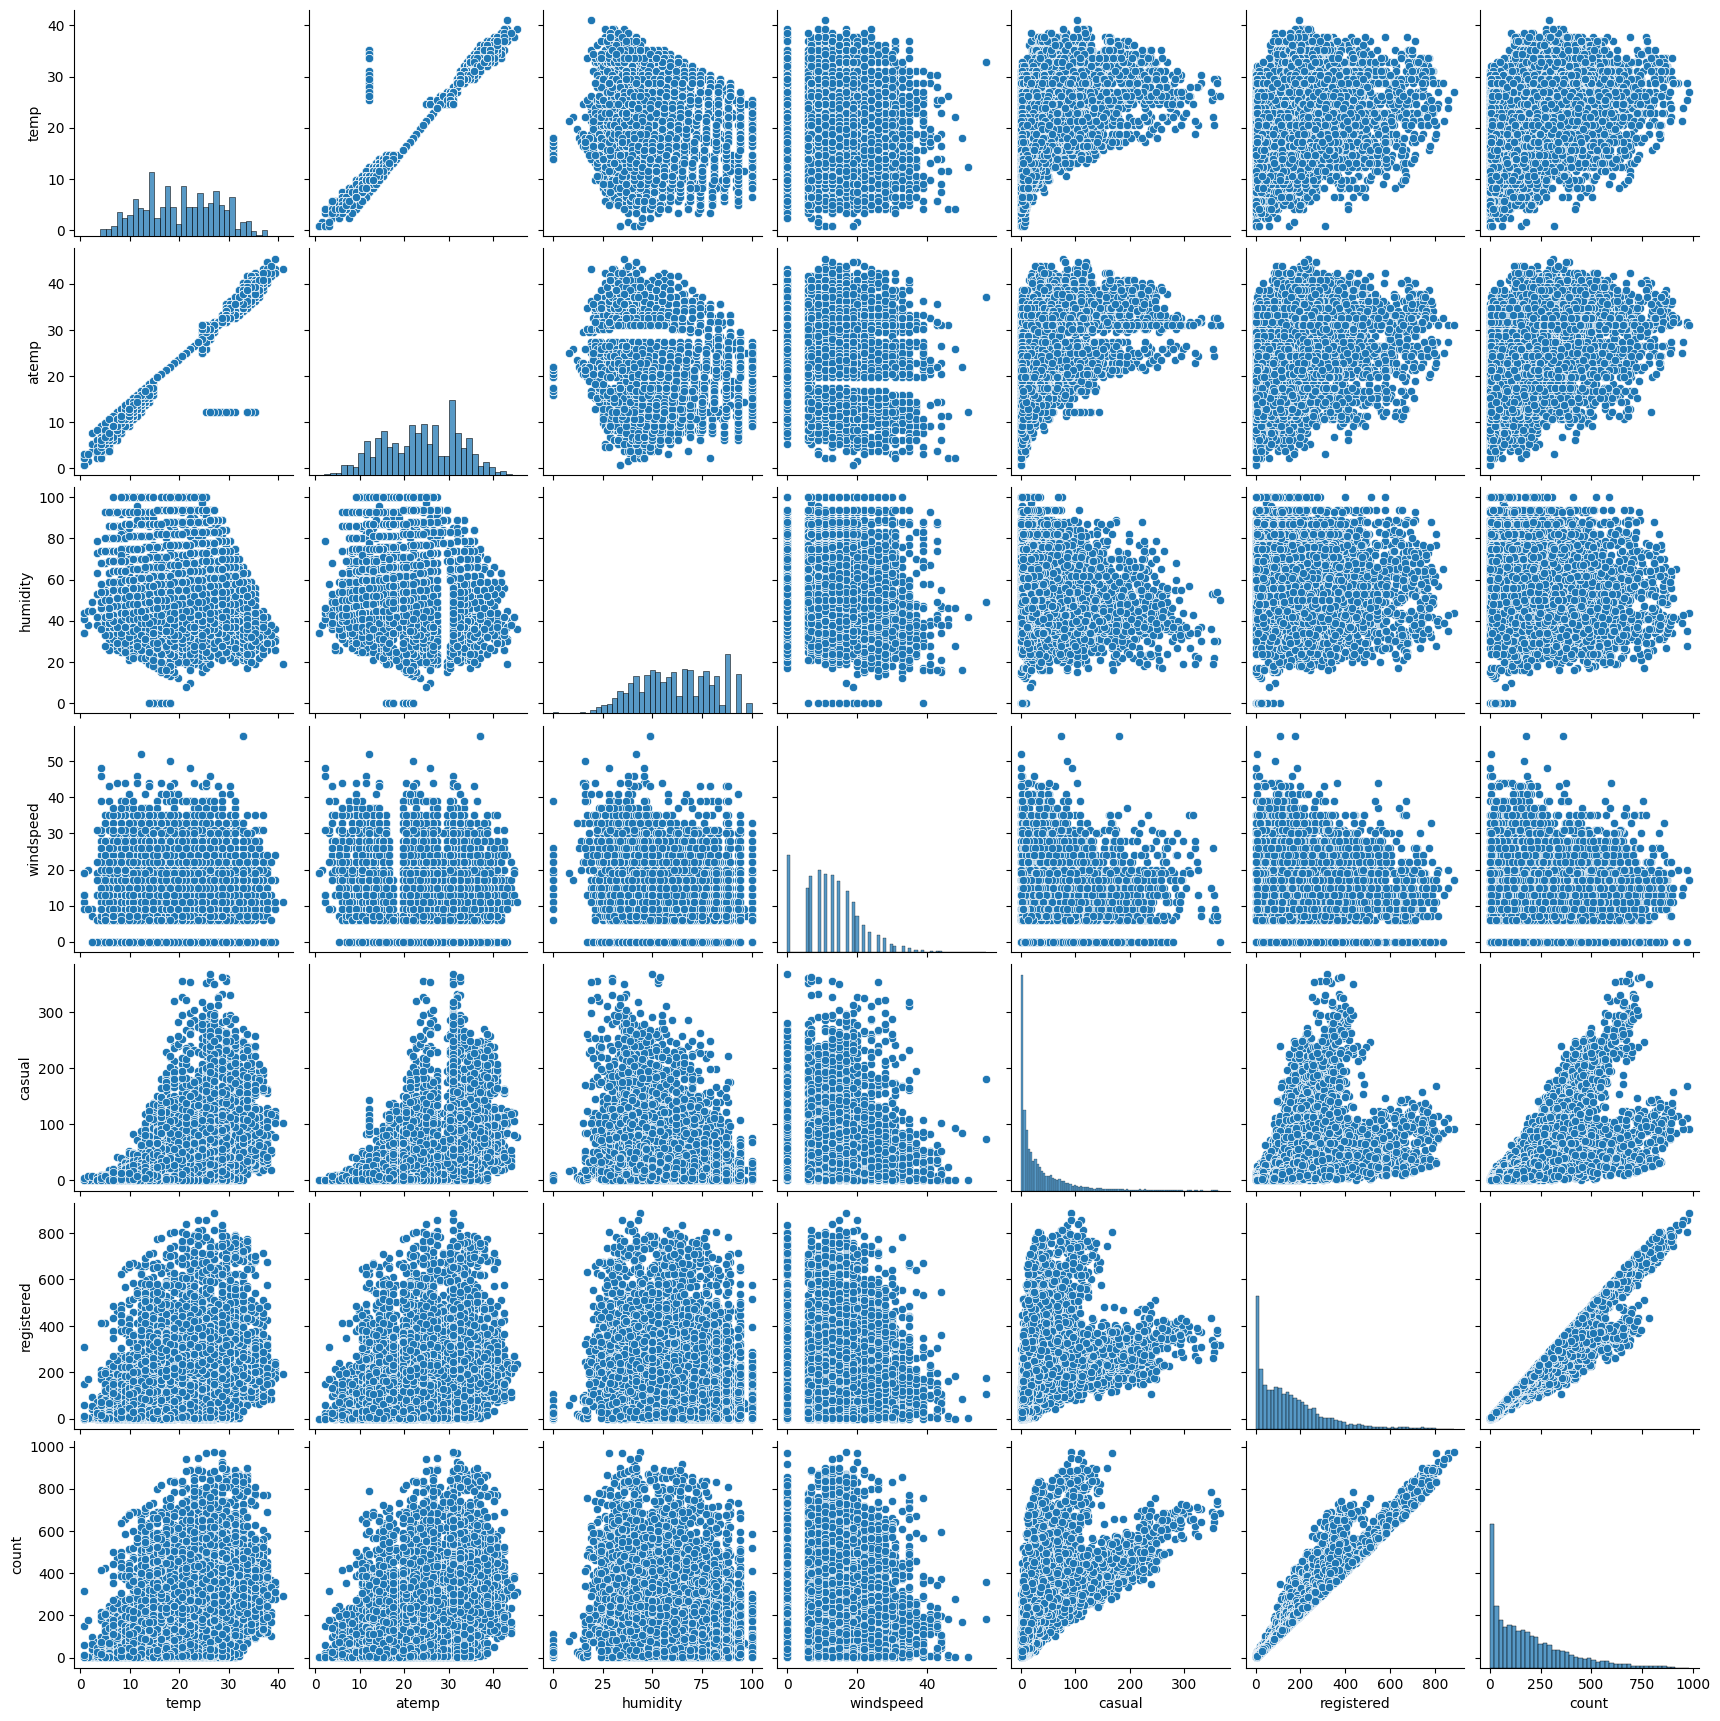

In [52]:
cols_to_plot = ['temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

sns.pairplot(df[cols_to_plot])
plt.show()

In [53]:
pd.crosstab(index=df['season'], columns=df['weather'],
normalize='columns').round(2)*100

weather,1,2,3,4
season,,,,
1,24.0,25.0,25.0,100.0
2,25.0,25.0,26.0,0.0
3,27.0,21.0,23.0,0.0
4,24.0,28.0,26.0,0.0


In [54]:
pd.crosstab(index=df['season'], columns=df['weather'],
normalize='index').round(2)*100

weather,1,2,3,4
season,,,,
1,65.0,27.0,8.0,0.0
2,66.0,26.0,8.0,0.0
3,71.0,22.0,7.0,0.0
4,62.0,30.0,8.0,0.0


- Highest percentage is for weather 1(clear) followed by 2(cloudy)   

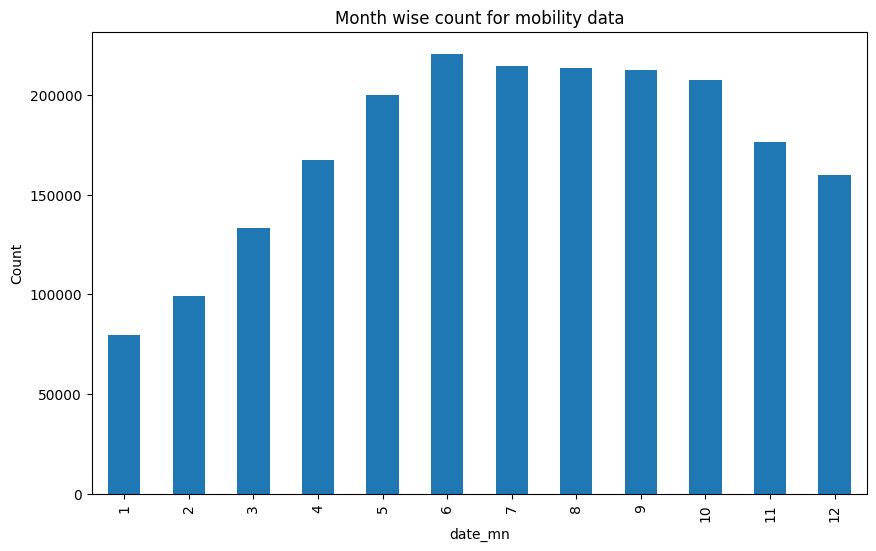

In [55]:
plt.figure(figsize=(10,6))
df.groupby(['date_mn'])['count'].sum().plot(kind="bar")
plt.title("Month wise count for mobility data")
plt.ylabel('Count')
plt.show()

- Count is highest for month 6    
- For months 5-10 count is highest  

<ipython-input-56-c6afd295e2f7>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['season'])['count'].sum().plot(kind="bar")


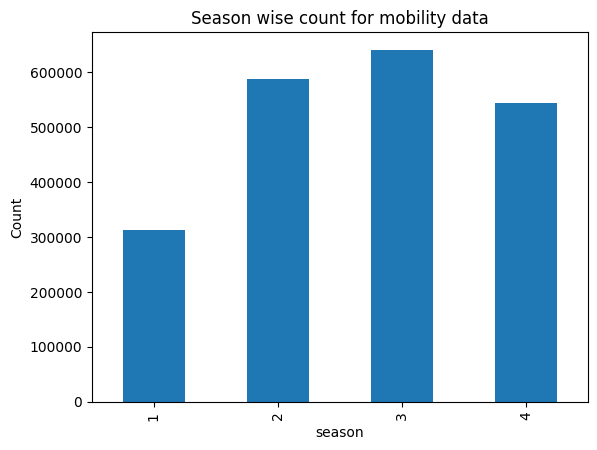

In [56]:
df.groupby(['season'])['count'].sum().plot(kind="bar")
plt.title("Season wise count for mobility data")
plt.ylabel('Count')
plt.show()

- count is more in season 3(fall), 2(summer)


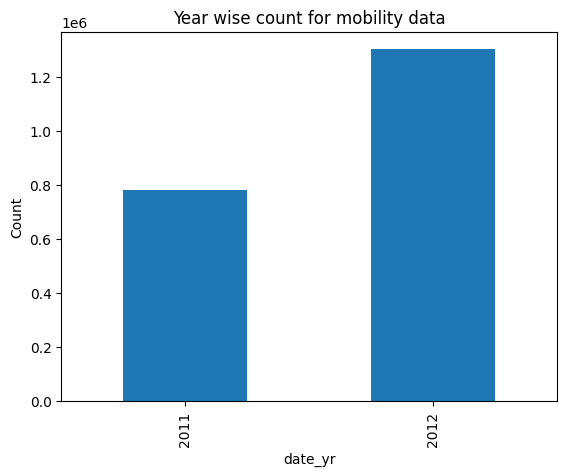

In [57]:
df.groupby(['date_yr'])['count'].sum().plot(kind="bar")
plt.title("Year wise count for mobility data")
plt.ylabel('Count')
plt.show()

- data shows an increasing trend for years 2011 , 2012

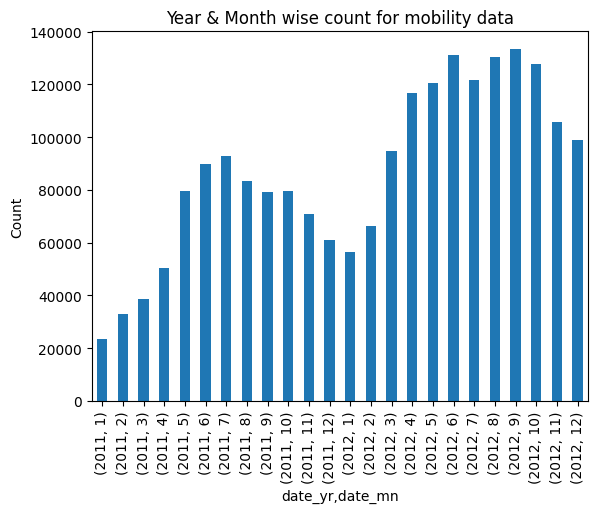

In [58]:
df.groupby(['date_yr','date_mn'])['count'].sum().plot(kind="bar")
plt.title("Year & Month wise count for mobility data")
plt.ylabel('Count')
plt.show()

- data shows month on month increasing trend for years 2011,2012   
- there is higher sales for months 5 to 9   

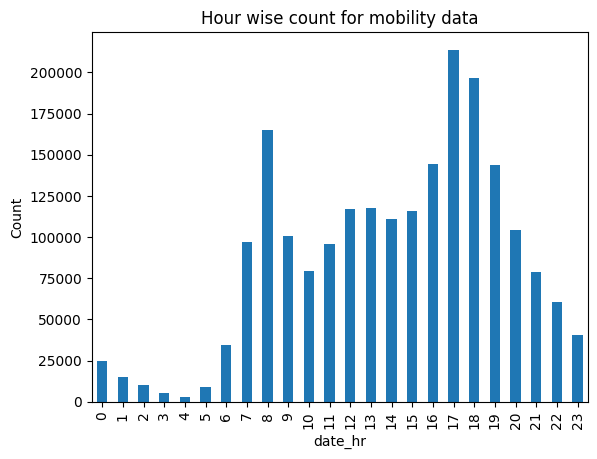

In [59]:
df.groupby(['date_hr'])['count'].sum().plot(kind="bar")
plt.title("Hour wise count for mobility data")
plt.ylabel('Count')
plt.show()

- There is more demand in day and evening from 7-20 hours
- during night hours (21 - 6 hours) there is less demand  

In [60]:
hour_count=df.groupby(['date_hr'])['count'].sum().reset_index()

In [61]:
replace_dict = {
    21: "night", 22: "night", 23: "night",
    0: "night", 1: "night", 2: "night",
    3: "night",4: "night", 5: "night", 6: "night",
    7: "morning", 8: "morning", 9: "morning",
    10: "day", 11: "day",12: "day",13: "day",14: "day",
    15: "evening", 16: "evening", 17: "evening", 18: "evening",
    19: "evening", 20: "evening"
}
hour_count["date_hr"]=hour_count["date_hr"].replace(replace_dict)

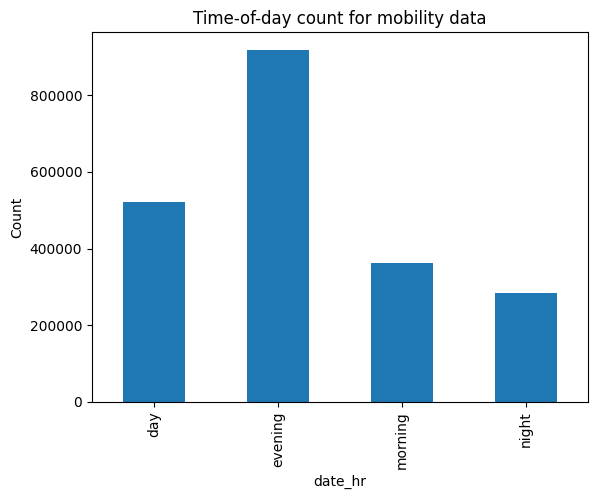

In [62]:
hour_count.groupby('date_hr')['count'].sum().plot(kind="bar")
plt.title("Time-of-day count for mobility data")
plt.ylabel('Count')
plt.show()

- During Evening (15-20) hrs count is highest
- during day(10-14) hrs count is 2nd highest

# 2.0 Hypothesis Testing (workingday vs count)

## 2.1 Working Day has effect on number of electric cycles rented

-  Working day is categorical attribute   
-  Count is Continuous attribute    
For testing categorical with continuous attribute we can use T-test.    

Assumptions for T-test   
1. Independence: the samples are independent  
2. Normality : Data from the 2 groups follow normal distribution   
3. Homogeneity of Variance: the 2 samples have same variance

## 2.2 create sample data

In [63]:
def check_pval(pval,alpha=0.05):
    '''
    check signifance of p-value
    default alpha=0.05
    '''
    print(f'p-value:{pval} alpha:{alpha}')
    if pval < alpha:
        print("Null Hypothesis rejected")
    else:
        print("Failed to reject Null hypothesis")

In [64]:
work_0 = df[df['workingday']==0]['count']
work_1 = df[df['workingday']==1]['count']

In [65]:
#get details of sample
work_0.describe().round(2)

,count
count,3474.00
mean,188.51
std,173.72
min,1.00
25%,44.00
50%,128.00
75%,304.00
max,783.00


In [66]:
#get details of sample
work_1.describe().round(2)

,count
count,7412.00
mean,193.01
std,184.51
min,1.00
25%,41.00
50%,151.00
75%,277.00
max,977.00


In [67]:
#create random sample from data
smpl0 = work_0.sample(n = 2000)
smpl1 = work_1.sample(n = 2000)

## 2.3 check t-test assumptions

### 2.3.1  Check Normality using shapiro test    
 -$H_0$ Null Hypothesis : Sample is normal  
 -$H_a$ Alternate Hypothesis : Sample is not normal

In [68]:
#check normality
test_stat,p_val = shapiro(smpl0)
check_pval(p_val)

p-value:4.1531093146918516e-36 alpha:0.05
Null Hypothesis rejected


In [69]:
#check normality
test_stat,p_val = shapiro(smpl1)
check_pval(p_val)

p-value:5.781200278929172e-38 alpha:0.05
Null Hypothesis rejected


**Result:** samples(smpl0,smpl1) are not normally distributed  

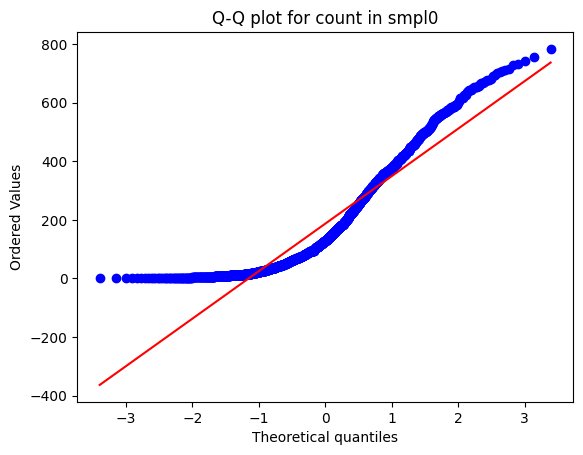

In [70]:
#visual check of sample distribution
probplot(smpl0, plot= plt, dist="norm")
plt.title('Q-Q plot for count in smpl0')
plt.show()

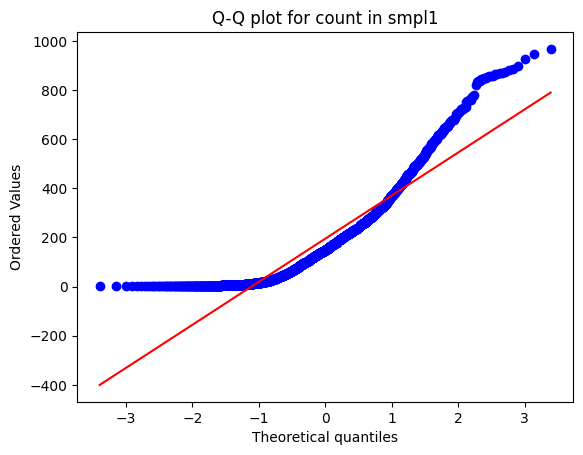

In [71]:
#visual check of sample distribution
probplot(smpl1, plot= plt, dist="norm")
plt.title('Q-Q plot for count in smpl1')
plt.show()

### 2.3.2  Check  Homogeneity of Variances        
__levene test__     
 -$H_0$ Null Hypothesis : variance is same   
 -$H_a$ Alternate Hypothesis :  variance is not same   

In [72]:
test_stat,p_val = levene(smpl0,smpl1)
check_pval(p_val)

p-value:0.27472777668173193 alpha:0.05
Failed to reject Null hypothesis


**Result:** samples(smpl0,smpl1) are of similar variance

## 2.4 Hypothesis test for workingday

### 2.4.a  Setup Null & Alternate hypothesis     
 Using T-Test we can check if "workingday" attribute has any effect on "count" the number of cycles rented.To test this we can setup       
   1. **Null hypotheses(H0)**: Two group means are equal
   2. **Alternative hypotheses(Ha)**: Two group means are not equal (two-tailed)
   
 $H_0 :    μ_0  =  μ_1$      
 $H_a :    μ_0   \neq  μ_1$

 Significance Level($\alpha$) = 0.05/2

In [73]:
#set significance level(alpha)
alpha=0.05/2  # for 2-tailed test

#perform 2 sample t-test
test_stat,p_val = ttest_ind(smpl0,smpl1) # 2-tailed test

#check significance
check_pval(p_val,alpha)

p-value:0.14325194878616182 alpha:0.025
Failed to reject Null hypothesis


## 2.4   Test Conclusion
t-test did not reject null hypothesis,we can say the means are equal with 95% confidence. So "workingday" attribute has no effect on "count" the number of cycles rented. The number of cycles rented is same on workday and non work day.

# 3.0 Hypothesis Testing  (season vs count)

## 3.1  Season has effect on number of electric cycles rented

-  season is categorical attribute  with 4 values     
     1: spring, 2: summer, 3: fall, 4: winter    
-  Count is Continuous attribute    
For testing multiple(3 or more) season with count  we can use ANOVA (Analysis of Variance).    

Assumptions for ANOVA       
1. Normality : Data for  each  groups follow normal distribution (gaussian)
2. Independence: the samples are independent  of other samples
3. Homogeneity of Variance: equal variance of data in different groups

## 3.2 create sample data

In [74]:
season_1 = df[df['season']==1]['count']
season_2 = df[df['season']==2]['count']
season_3 = df[df['season']==3]['count']
season_4 = df[df['season']==4]['count']

In [75]:
season_1.describe()

,count
count,2686.000000
mean,116.343261
std,125.273974
min,1.000000
25%,24.000000
50%,78.000000
75%,164.000000
max,801.000000


In [76]:
season_2.describe()

,count
count,2733.000000
mean,215.251372
std,192.007843
min,1.000000
25%,49.000000
50%,172.000000
75%,321.000000
max,873.000000


In [77]:
season_3.describe()

,count
count,2733.000000
mean,234.417124
std,197.151001
min,1.000000
25%,68.000000
50%,195.000000
75%,347.000000
max,977.000000


In [78]:
season_4.describe()

,count
count,2734.000000
mean,198.988296
std,177.622409
min,1.000000
25%,51.000000
50%,161.000000
75%,294.000000
max,948.000000


In [79]:
#create random sample from data
s1 = season_1.sample(n = 1000)
s2 = season_2.sample(n = 1000)
s3 = season_3.sample(n = 1000)
s4 = season_4.sample(n = 1000)

### 3.3 check ANOVA assumptions

### 3.3.a  Check Normality using shapiro test
 -$H_0$ Null Hypothesis : Sample is normal  
 -$H_a$ Alternate Hypothesis : Sample is not normal

In [80]:
#check normality
test_stat,p_val = shapiro(s1)
check_pval(p_val)

p-value:5.6984505109761715e-33 alpha:0.05
Null Hypothesis rejected


In [81]:
#check normality
test_stat,p_val = shapiro(s2)
check_pval(p_val)

p-value:3.06721564844142e-25 alpha:0.05
Null Hypothesis rejected


In [82]:
#check normality
test_stat,p_val = shapiro(s3)
check_pval(p_val)

p-value:3.8617216972723075e-23 alpha:0.05
Null Hypothesis rejected


In [83]:
#check normality
test_stat,p_val = shapiro(s4)
check_pval(p_val)

p-value:1.679033661324734e-24 alpha:0.05
Null Hypothesis rejected


**Result:** samples are not normally distributed  

### 3.3.b  Check  Homogeneity of Variances
__levene test__     
 -$H_0$ Null Hypothesis : variance is same   
 -$H_a$ Alternate Hypothesis :  variance is not same   

In [84]:
test_stat,p_val = levene(s1,s2,s3,s4)
check_pval(p_val)

p-value:2.137392962152677e-44 alpha:0.05
Null Hypothesis rejected


**Result:** samples variance is not same

## 3.4 Hypothesis test for season

### 3.4.a  Setup Null & Alternate hypothesis     
 Using ANOVA we can check if "season" attribute has any effect on "count" the number of cycles rented.To test this we can setup       
   1. **Null hypotheses(H0)**:   group means are same
   2. **Alternative hypotheses(Ha)**: Two group means are not same  
   
 $H_0 :    μ_1  =  μ_2  =  μ_3  =  μ_4$      
 $H_a :    μ_1   \neq  μ_2 \neq  μ_3 \neq  μ_4$

 Significance Level($\alpha$) = 0.05/2

In [85]:
#set significance level(alpha)
alpha=0.05

#perform 2 sample t-test
test_stat,p_val = f_oneway(s1, s2, s3, s4)

#check significance
check_pval(p_val,alpha)

p-value:1.4465990385889155e-60 alpha:0.05
Null Hypothesis rejected


## 3.5 Test Conclusion

ANOVA rejected null hypothesis,we can say the means are not equal with 95% confidence. So "season" attribute has  effect on "count" the number of cycles rented

# 4.0 Hypothesis Testing  (weather vs count)

## 4.1  weather has effect on number of electric cycles rented

-  weather is categorical attribute  with 4 values     
      1. Clear, Few clouds, partly cloudy, partly cloudy
      2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
      3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds       
      4.  Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog   
     
-  Count is Continuous attribute    
For testing multiple(3 or more) season with count  we can use ANOVA (Analysis of Variance).    

Assumptions for ANOVA       
1. Normality : Data for  each  groups follow normal distribution (gaussian)
2. Independence: the samples are independent  of other samples
3. Homogeneity of Variance: equal variance of data in different groups

## 4.2 create sample data

In [86]:
weather_1 = df[df['weather']==1]['count']
weather_2 = df[df['weather']==2]['count']
weather_3 = df[df['weather']==3]['count']
weather_4 = df[df['weather']==4]['count']

In [87]:
weather_1.describe()

,count
count,7192.000000
mean,205.236791
std,187.959566
min,1.000000
25%,48.000000
50%,161.000000
75%,305.000000
max,977.000000


In [88]:
weather_2.describe()

,count
count,2834.000000
mean,178.955540
std,168.366413
min,1.000000
25%,41.000000
50%,134.000000
75%,264.000000
max,890.000000


In [89]:
weather_3.describe()

,count
count,859.000000
mean,118.846333
std,138.581297
min,1.000000
25%,23.000000
50%,71.000000
75%,161.000000
max,891.000000


In [90]:
weather_4.describe()

,count
count,1.0
mean,164.0
std,NaN
min,164.0
25%,164.0
50%,164.0
75%,164.0
max,164.0


In [91]:
#create random sample from data
w1 = season_1.sample(n = 1000)
w2 = season_2.sample(n = 1000)
w3 = season_3.sample(n = 800)
w4 = season_4.sample(n = 1 )

## 4.3 check ANOVA assumptions

### 4.3.a  Check Normality using shapiro test
 -$H_0$ Null Hypothesis : Sample is normal  
 -$H_a$ Alternate Hypothesis : Sample is not normal

In [92]:
#check normality
test_stat,p_val = shapiro(w1)
check_pval(p_val)

p-value:2.4979652436452676e-33 alpha:0.05
Null Hypothesis rejected


In [93]:
#check normality
test_stat,p_val = shapiro(w2)
check_pval(p_val)

p-value:1.3983990852754468e-24 alpha:0.05
Null Hypothesis rejected


In [94]:
#check normality
test_stat,p_val = shapiro(w3)
check_pval(p_val)

p-value:7.347319338809852e-20 alpha:0.05
Null Hypothesis rejected


In [95]:
#check normality
len(weather_4)

1

since weather_4 has only one observation we can skip testing this

**Result:** weather samples are not normally distributed  

### 4.3.b  Check  Homogeneity of Variances
__levene test__     
 -$H_0$ Null Hypothesis : variance is same   
 -$H_a$ Alternate Hypothesis :  variance is not same   

In [96]:
test_stat,p_val = levene(w1,w2,w3,w4)
check_pval(p_val)

p-value:1.7089890099633347e-39 alpha:0.05
Null Hypothesis rejected


**Result:** samples variance is not same

## 4.4 Hypothesis test for season

### 4.4.a  Setup Null & Alternate hypothesis     
 Using ANOVA we can check if "season" attribute has any effect on "count" the number of cycles rented.To test this we can setup       
   1. **Null hypotheses(H0)**:   group means are same
   2. **Alternative hypotheses(Ha)**: Two group means are not same  
   
 $H_0 :    μ_1  =  μ_2  =  μ_3  =  μ_4$      
 $H_a :    μ_1   \neq  μ_2 \neq  μ_3 \neq  μ_4$

 Significance Level($\alpha$) = 0.05

In [97]:
#set significance level(alpha)
alpha=0.05

#perform 2 sample t-test
test_stat,p_val = f_oneway(w1,w2,w3,w4)

#check significance
check_pval(p_val,alpha)

p-value:6.014220540320908e-53 alpha:0.05
Null Hypothesis rejected


## 4.5 Test Conclusion

ANOVA rejected null hypothesis,we can say the means are not equal with 95% confidence. So "weather" attribute has  effect on "count" the number of cycles rented

# 5.0 Hypothesis Testing  (season vs  Weather )

## 5.1  Season has effect on  Weather

-  season is categorical attribute  with 4 values     
     1: spring, 2: summer, 3: fall, 4: winter    
-  weather is categorical attribute  with 4 values     
      1. Clear, Few clouds, partly cloudy, partly cloudy
      2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
      3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds       
      4.  Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog    
      
For testing season(categorical) with weather(categorical)   we can use chi-square test.    

Assumptions for  $\chi^2$   test of independence       
1. Variables are categorical
2. Observations are independent
3. Each cell is mutually exclusive
4. Expected value in each cell is at least 5 (at least in 80% of cells)   

 Significance Level($\alpha$) = 0.05

## 5.2 Hypothesis test for season

### 5.2.a  Setup Null & Alternate hypothesis     
 Using $\chi^2$ we can check if "season" attribute has any effect on "weather".  
   1. **Null hypotheses(H0)**:   variables are independent
   2. **Alternative hypotheses(Ha)**: variables are dependent
   

 Significance Level($\alpha$) = 0.05

In [98]:
chi_data = pd.crosstab(df["season"], df["weather"])
chi_data

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [99]:
#set significance level(alpha)
alpha=0.05

#perform ch-squared test
test_stat,p_val,dof,chi_out = chi2_contingency(chi_data)

#check significance
check_pval(p_val,alpha)

p-value:1.549925073686492e-07 alpha:0.05
Null Hypothesis rejected


## 5.3 Test Conclusion
 Chi-squared test rejected null hypothesis,we can say the means are not equal with 95% confidence. So "season" attribute is dependent on weather.

##  6.0 Business Insights

###  6.1   Insights from Analysis



### Natural Factors
weather
- 66% is of type 1 (Clear weather)
- 26% is of type 2 (fewCloud)
- So 92% of usage is when weather is good
- Highest percentage is for weather 1(clear) followed by 2(cloudy)

season
- count is more in season 3(fall), 2(summer)

temp
- 77% of temp is between 10-30 celcius
- So most usage is when temparature is moderate

atemp
- 87% of atemp is between 10-35 celcius
- variables temp, atemp have high correlation(0.98)

humidity
- 78.7% of humidity is between 40-90 celcius

windspeed
- 86.3% of windspeed is between 0-20
- During high windspeed usage is less

### User Factors
casual
- 85.7% of casual is between 0-75 count    
- From the boxplot we observe lower variability below median. There are also some outliers.

registered
- 96.11% of registered is between 0-500 count    
- Boxplot for "resgistered users" shows low variability below median.It also shows presence of outliers.

count
- 92.7% of count is between 0-500 count    
- variables registered, count have high correlation(0.97)

### Time Factors
datetime
- Range for datetime is (2011-01-01,2012-12-19 ). So data is for 24 months from Jan-2011 to Dec-2012

holiday
- Only 2.9% observations are of type holiday=1

workingday
- 68 % observations are of type workingday = 1

- data shows an increasing trend for years 2011 , 2012

- data shows month on month increasing trend for years 2011,2012
- there is higher sales for months 5 to 9

date_hr
- There is more demand in day and evening from 7-20 hours
- during night hours (21 - 6 hours) there is less demand
- During Evening (15-20) hrs count is highest
- during day(10-14) hrs count is 2nd highest

###  6.2   Insights from Tests
effect of Working Day on  number of electric cycles rented
- t-test did not reject null hypothesis,we can say the means are equal with 95% confidence. So "workingday" attribute has no effect on "count" the number of cycles rented.The number of cycles rented is same on workday and non work day.

Season has effect on number of electric cycles rented
- ANOVA rejected null hypothesis,we can say the means are not equal with 95% confidence. So "season" attribute has  effect on "count" the number of cycles rented

weather has effect on number of electric cycles rented
- ANOVA rejected null hypothesis,we can say the means are not equal with 95% confidence. So "weather" attribute has effect on "count" the number of cycles rented    

 "season" attribute has any effect on "weather".
- Chi-squared test rejected null hypothesis,we can say the means are not equal with 95% confidence. So "season" attribute is dependent on weather.

# 7.0 Final Insights

## Natural Factors
- 92% of usage is when weather is good
- count is more in season 3(fall), 2(summer)
- 77% of temp is between 10-30 celcius
- 78.7% of humidity is between 40-90 celcius
- 86.3% of windspeed is between 0-20
- weather & season are dependent   

**Conclusion** : Major demand is when natural factors are favourable for riding cycles

## User Factors
- 85.7% of casual is between 0-75 count
- 96.11% of registered is between 0-500 count
- season & weather affect count
- variables registered, count have high correlation(0.97)

**Conclusion** : Major users are registered with (0,500) range. while casual users are in range(0,75)   

## Time Factors
- data is for 24 months from Jan-2011 to Dec-2012
- data shows month on month increasing trend for years 2011,2012
- there is higher sales for months 5 to 9
- count is more in season 3(fall), 2(summer)
- There is more demand in day and evening from 7-20 hours
- during night hours (21 - 6 hours) there is less demand
- workday has no effect on count

**Conclusion** : User count varies with season,month, time of day.

# 8.0 Recommendations


- Registered users are majority, to enchance thier experience various schemes can be devised  
- During holidays promotions can be devised to increase casual users
- Offers can be given to casual users to become registered users
- During peak time effort should be made to ensure adequate availability of cycles
- During offpeak time promotions & discounts can be used to increase ridership
- All maintainance can be done in offpeak time to prepare for peak time
- Promotions & marketing should be done to enhance ridership during favourable natural factors
- During unfavourable natural conditions extra facitilies can be provided to increase rider count
- Discounts can be given during unfavourable natural conditions to increase ridership